In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
# import data
epl_df = pd.read_csv('/Users/egor/Downloads/archive-2/goals.csv', encoding = 'unicode_escape')
assist = pd.read_csv('/Users/egor/Downloads/archive-2/attacking.csv', encoding = 'unicode_escape')
discipline = pd.read_csv('/Users/egor/Downloads/archive-2/disciplinary.csv', encoding = 'unicode_escape')
discipline.head()

,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
0,1,JoÃ£o Palhinha,Sporting CP,Midfielder,23,17,2,0,534,6
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12
2,2,Rodri,Man. City,Midfielder,19,4,2,0,842,10
3,2,Seiwald,Salzburg,Midfielder,19,3,2,0,649,8
4,5,Balanta,Club Brugge,Midfielder,18,3,4,0,407,5


In [57]:
# get information about dataset
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   serial         183 non-null    int64 
 1   player_name    183 non-null    object
 2   club           183 non-null    object
 3   position       183 non-null    object
 4   goals          183 non-null    int64 
 5   right_foot     183 non-null    int64 
 6   left_foot      183 non-null    int64 
 7   headers        183 non-null    int64 
 8   others         183 non-null    int64 
 9   inside_area    183 non-null    int64 
 10  outside_areas  183 non-null    int64 
 11  penalties      183 non-null    int64 
 12  match_played   183 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 18.7+ KB


In [58]:
# statistics of the dataset
epl_df.describe()

,serial,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,55.016393,2.021858,0.972678,0.693989,0.327869,0.021858,1.814208,0.207650,0.196721,6.841530
std,24.173929,2.005367,1.400281,1.140810,0.612722,0.146621,1.923943,0.514137,0.549315,2.568196
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,43.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000
50%,73.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000
75%,73.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,8.000000
max,73.000000,15.000000,11.000000,8.000000,3.000000,1.000000,13.000000,3.000000,3.000000,13.000000


In [59]:
# number of null values
epl_df.isna().sum()

serial           0
player_name      0
club             0
position         0
goals            0
right_foot       0
left_foot        0
headers          0
others           0
inside_area      0
outside_areas    0
penalties        0
match_played     0
dtype: int64

In [77]:
# add a column
epl_df['goals_per_match'] = (epl_df['goals'] / epl_df['match_played'])
print(epl_df.head())

   serial  player_name         club    position  goals  right_foot  left_foot  \
0       1      Benzema  Real Madrid     Forward     15          11          1   
1       2  Lewandowski       Bayern     Forward     13           8          3   
2       3       Haller         Ajax     Forward     11           3          4   
3       4        Salah    Liverpool     Forward      8           0          8   
4       5       Nkunku      Leipzig  Midfielder      7           3          1   

   headers  others  inside_area  outside_areas  penalties  match_played  \
0        3       0           13              2          3            12   
1        1       1           13              0          3            10   
2        3       1           11              0          1             8   
3        0       0            7              1          1            13   
4        3       0            7              0          0             6   

   goals_per_match  
0         1.250000  
1         1.300000  

In [54]:
# total goals with left foot
total_goals = epl_df['left_foot'].sum()
print(total_goals)

127


In [55]:
# total number of goals scored with other body part
total_assists = epl_df['others'].sum()
print(total_assists)

4


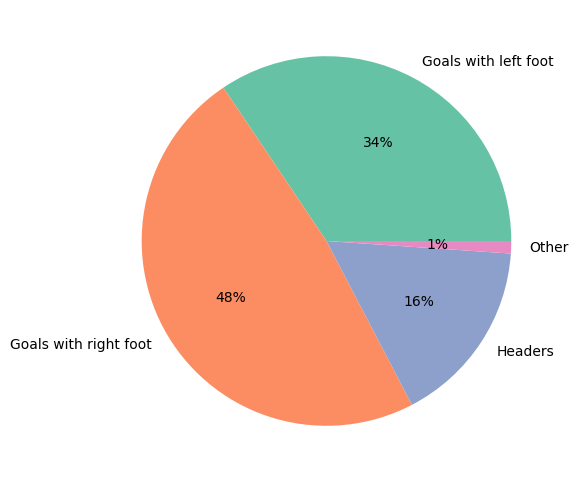

In [56]:
# create a pie chart
plt.figure(figsize = (13, 6))
goals_left = epl_df['left_foot'].sum()
goals_right = epl_df['right_foot'].sum()
header = epl_df['headers'].sum()
other = epl_df['others'].sum()
data = [goals_left, goals_right, header, other]
labels = ['Goals with left foot', 'Goals with right foot', 'Headers', 'Other']
color = sns.color_palette('Set2')
plt.pie(data, labels = labels, colors = color, autopct = '%.0f%%')
plt.show()

In [62]:
# number of unique clubs 
np.size((epl_df['club'].unique()))


32

<Axes: xlabel='club'>

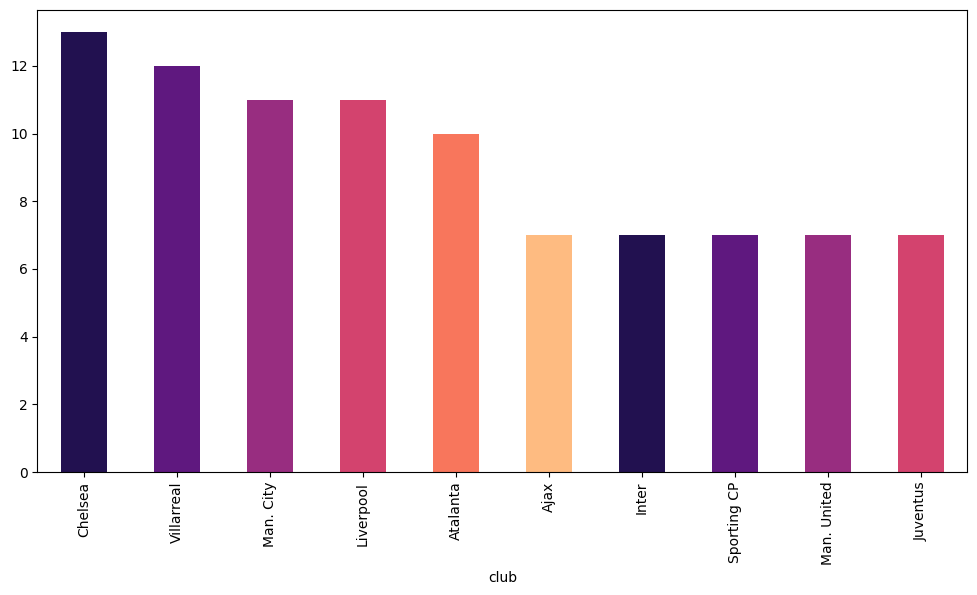

In [64]:

clubs = epl_df.groupby('club').size().sort_values(ascending = False)
clubs.head(10).plot(kind = 'bar', figsize = (12,6), color = sns.color_palette("magma"))

Text(0.5, 1.0, 'Plot of Clubs vs Assists')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 159 (\x9f) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


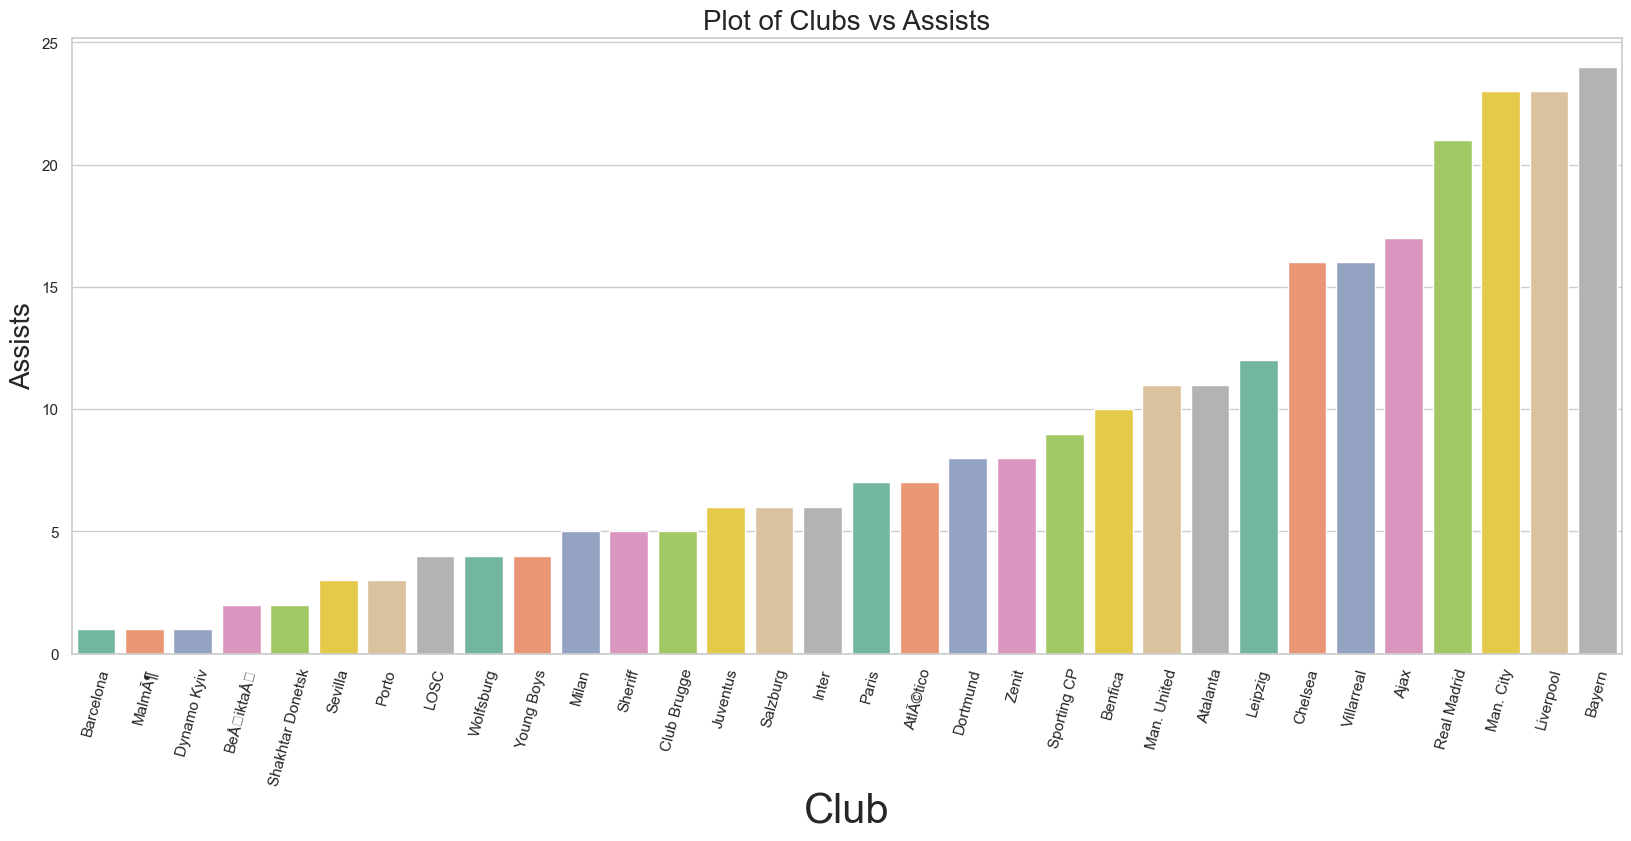

In [68]:
# total assists from each club
assists_by_clubs = pd.DataFrame(assist.groupby('club', as_index = False)['assists'].sum())
sns.set_theme(style = 'whitegrid', color_codes = True)
ax = sns.barplot(x = 'club', y = 'assists', data=assists_by_clubs.sort_values(by='assists'), palette = 'Set2')
ax.set_xlabel('Club', fontsize = 30)
ax.set_ylabel('Assists', fontsize = 20)
plt.xticks(rotation = 75)
plt.rcParams["figure.figsize"] = (20, 8)
plt.title('Plot of Clubs vs Assists', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Goals')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 159 (\x9f) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


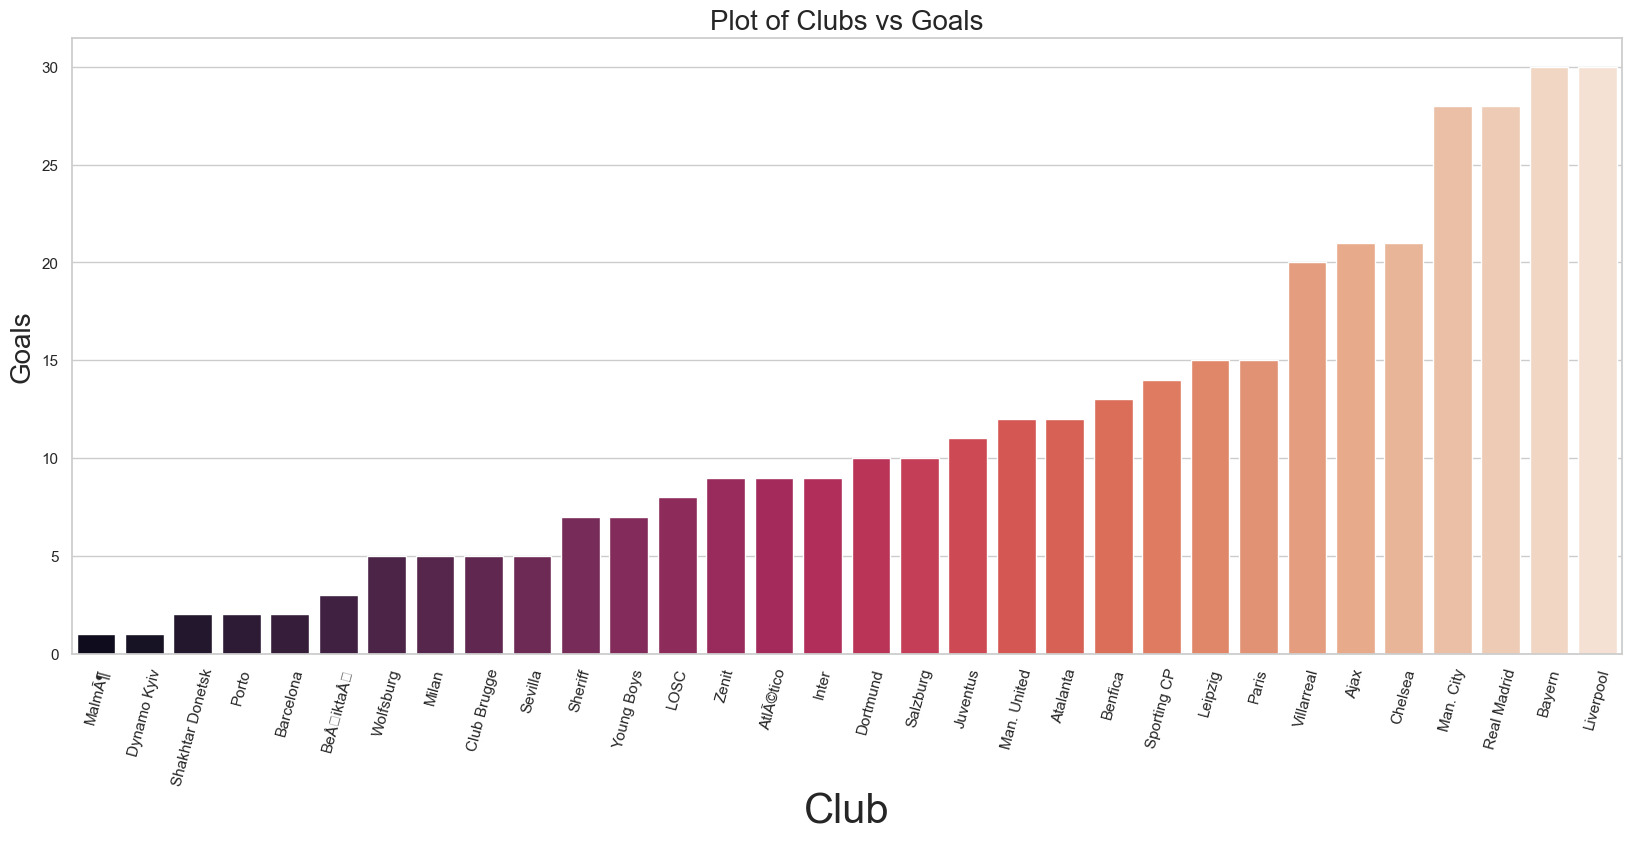

In [70]:
# total goals from each club
goals_by_clubs = pd.DataFrame(epl_df.groupby('club', as_index = False)['goals'].sum())
sns.set_theme(style = 'whitegrid', color_codes = True)
ax = sns.barplot(x = 'club', y = 'goals', data=goals_by_clubs.sort_values(by='goals'), palette = 'rocket')
ax.set_xlabel('Club', fontsize = 30)
ax.set_ylabel('Goals', fontsize = 20)
plt.xticks(rotation = 75)
plt.rcParams["figure.figsize"] = (20, 8)
plt.title('Plot of Clubs vs Goals', fontsize = 20)

In [71]:
# top 10 assists
top_10_assists = assist[['player_name', 'club', 'assists', 'match_played']].nlargest(n = 10, columns = 'assists')
top_10_assists

,player_name,club,assists,match_played
0,Bruno Fernandes,Man. United,7,7
1,VinÃ­cius JÃºnior,Real Madrid,6,13
2,SanÃ©,Bayern,6,10
3,Antony,Ajax,5,7
4,Alexander-Arnold,Liverpool,4,9
5,De Bruyne,Man. City,4,10
6,ModriÄ,Real Madrid,4,13
7,JoÃ£o MÃ¡rio,Benfica,4,8
8,MbappÃ©,Paris,4,8
9,Gerard Moreno,Villarreal,4,7


In [74]:
# most offsides by players
offside = assist[['player_name', 'club', 'offsides', 'match_played']].nlargest(n = 15, columns = 'offsides')
offside

,player_name,club,offsides,match_played
76,De Ketelaere,Club Brugge,10,6
48,AndrÃ© Silva,Leipzig,9,6
86,Benzema,Real Madrid,9,12
97,ManÃ©,Liverpool,9,13
8,MbappÃ©,Paris,8,8
13,MÃ¼ller,Bayern,8,10
40,Danjuma,Villarreal,8,11
19,Zapata,Atalanta,7,6
20,Lewandowski,Bayern,7,10
80,Reus,Dortmund,7,6


In [79]:
# top 10 goals per match
gpm = epl_df[['player_name', 'goals_per_match', 'goals', 'match_played']].nlargest(n = 10, columns = 'goals_per_match')
gpm

,player_name,goals_per_match,goals,match_played
2,Haller,1.375000,11,8
1,Lewandowski,1.300000,13,10
0,Benzema,1.250000,15,12
4,Nkunku,1.166667,7,6
41,Haaland,1.000000,3,3
128,Ozdoev,1.000000,1,1
8,Ronaldo,0.857143,6,7
11,Firmino,0.833333,5,6
16,Werner,0.800000,4,5
17,Pedro GonÃ§alves,0.800000,4,5


In [96]:
# add a column to discipline
discipline['fouls_per_match'] = (discipline['fouls_committed']/discipline['match_played'])
discipline.head()

,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played,fouls_per_minute,fouls_per_match
0,1,JoÃ£o Palhinha,Sporting CP,Midfielder,23,17,2,0,534,6,0.043071,3.833333
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12,0.018164,1.583333
2,2,Rodri,Man. City,Midfielder,19,4,2,0,842,10,0.022565,1.900000
3,2,Seiwald,Salzburg,Midfielder,19,3,2,0,649,8,0.029276,2.375000
4,5,Balanta,Club Brugge,Midfielder,18,3,4,0,407,5,0.044226,3.600000


<Axes: title={'center': 'Players fouling most often'}, xlabel='player_name', ylabel='Fouls per match'>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


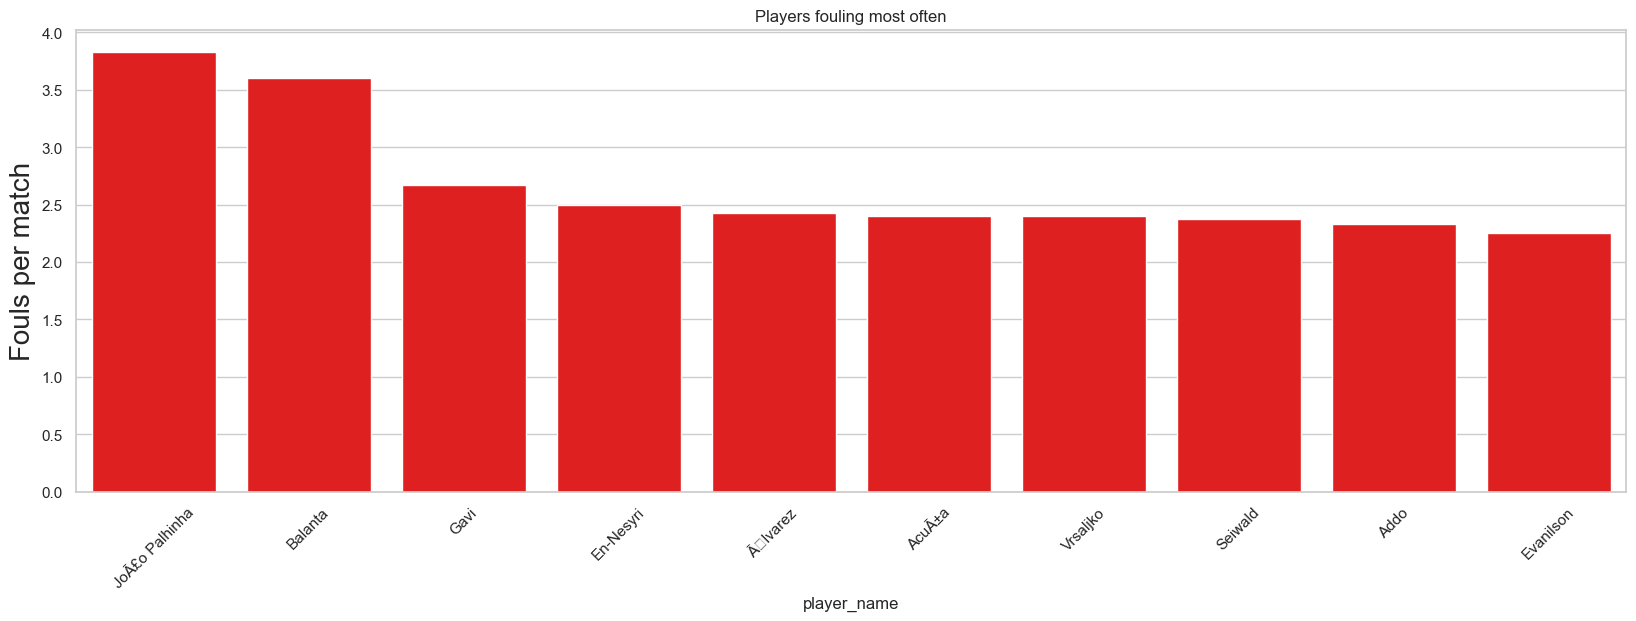

In [97]:
# top 10 players with most fouls per match

fouls = discipline.sort_values(by = 'fouls_per_match', ascending = False)[:10]
plt.figure(figsize = (20, 6))
plt.title('Players fouling most often')
v = sns.barplot(x = fouls['player_name'], y = fouls['fouls_per_match'], label = 'Players', color = 'red')
plt.ylabel('Fouls per match', fontsize = 20)
v.set_xticklabels(v.get_xticklabels(), rotation = 45)
v